In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('earthquake_data_tsunami.csv')
df

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


# 1.Time-Based

### Explore how earthquake occurrences and tsunami events have changed over the 22-year period(2001-2022)

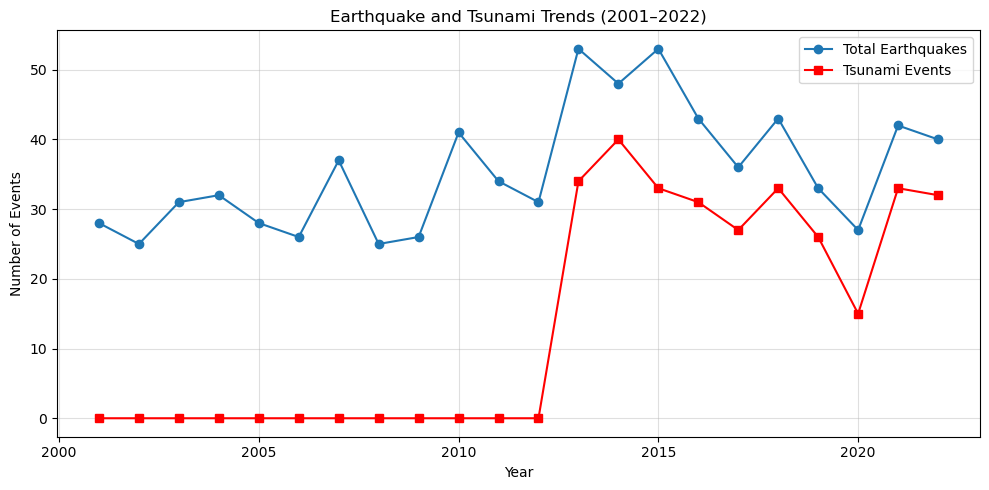

In [4]:
yearly = df.groupby("Year")[["tsunami"]].agg(
    earthquakes=("tsunami", "size"), tsunamis=("tsunami", "sum")
).reset_index()

plt.figure(figsize=(10,5))
plt.plot(yearly["Year"], yearly["earthquakes"], 'o-', label="Total Earthquakes")
plt.plot(yearly["Year"], yearly["tsunamis"], 's-r', label="Tsunami Events")
plt.title("Earthquake and Tsunami Trends (2001–2022)")
plt.xlabel("Year"); plt.ylabel("Number of Events")
plt.legend(); plt.grid(alpha=0.4); plt.tight_layout()
plt.show()

### Identify any trends in the frequency or magnitude of earthquakes over time.

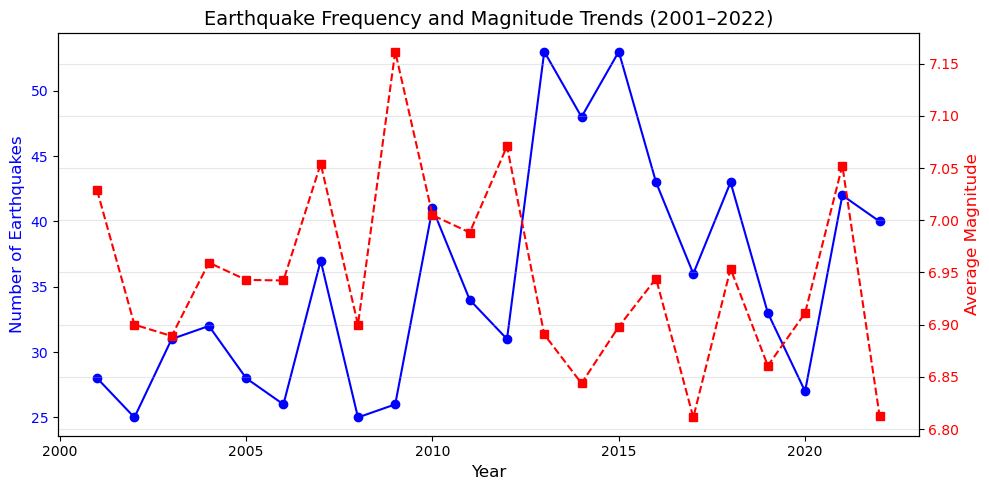

In [5]:
trend_df = df.groupby("Year").agg(
    earthquakes=("Year", "count"),
    avg_magnitude=("magnitude", "mean")
).reset_index()

# Plot trends
fig, ax1 = plt.subplots(figsize=(10, 5))

# Left y-axis: Earthquake frequency
ax1.plot(trend_df["Year"], trend_df["earthquakes"], 'o-', color='blue', label="Total Earthquakes")
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Number of Earthquakes", color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis: Average magnitude
ax2 = ax1.twinx()
ax2.plot(trend_df["Year"], trend_df["avg_magnitude"], 's--', color='red', label="Average Magnitude")
ax2.set_ylabel("Average Magnitude", color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Title, grid, and layout
plt.title("Earthquake Frequency and Magnitude Trends (2001–2022)", fontsize=14)
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()

# 2. Magnitude and Depth Analysis
### Analyze the distribution of earthquake magnitudes and depths.

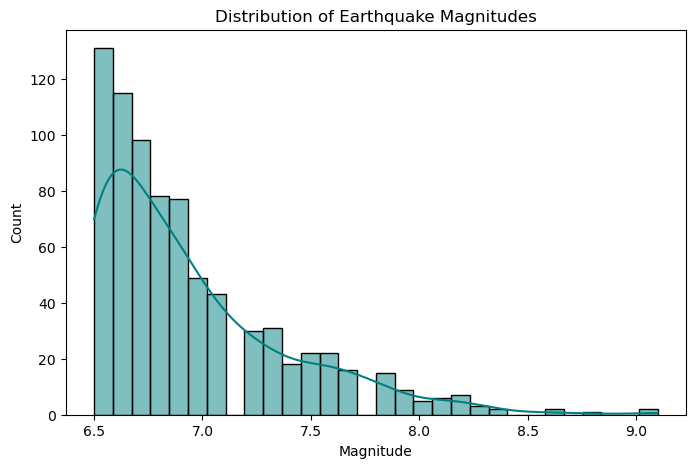

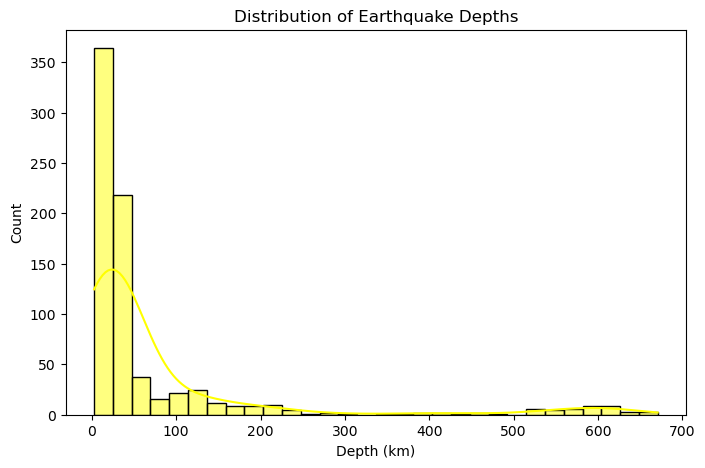

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['magnitude'], bins=30, kde=True, color="teal")
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['depth'], bins=30, kde=True, color="yellow")
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.show()

### Compare magnitude and depth of tsunami vs. non-tsunami events.

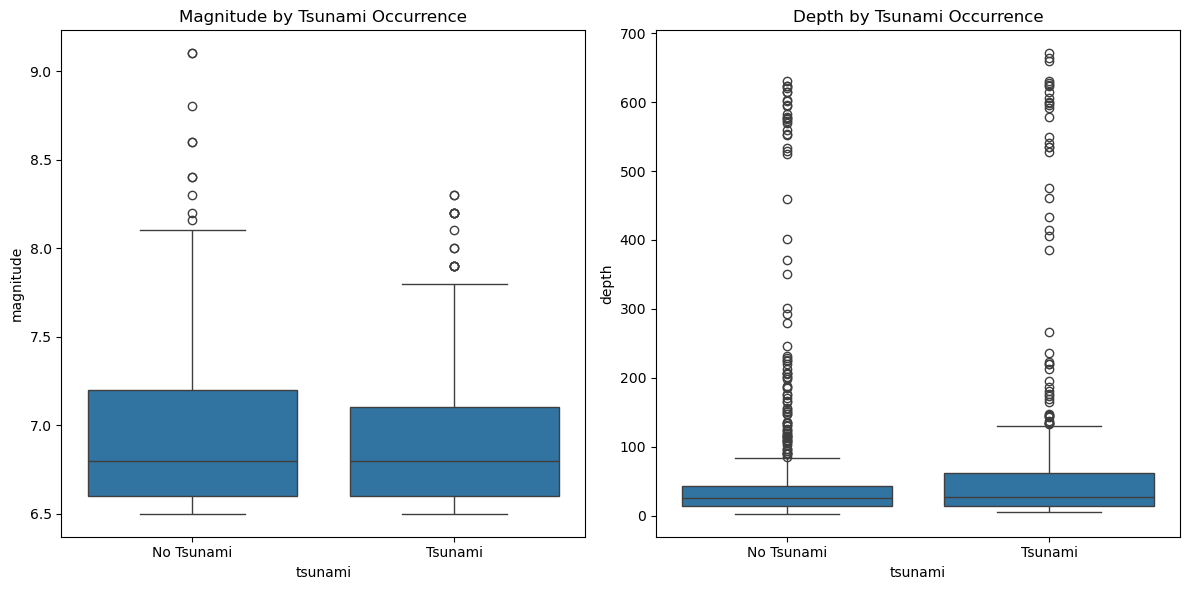

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='tsunami', y='magnitude', data=df)
plt.title('Magnitude by Tsunami Occurrence')
plt.xticks([0, 1], ['No Tsunami', 'Tsunami'])

plt.subplot(1, 2, 2)
sns.boxplot(x='tsunami', y='depth', data=df)
plt.title('Depth by Tsunami Occurrence')
plt.xticks([0, 1], ['No Tsunami', 'Tsunami'])
plt.tight_layout()
plt.show()

### major earthquakes (≥8.0).

In [17]:
# Major earthquakes (>=8.0)
major = df[df['magnitude'] >= 8.0]
print("Major Earthquakes (>=8.0):\n", major[['Year', 'magnitude', 'depth', 'tsunami']].head())
print("Count:", len(major))

Major Earthquakes (>=8.0):
      Year  magnitude   depth  tsunami
56   2021        8.1   22.79        0
59   2021        8.2   46.66        1
60   2021        8.2   35.00        1
74   2021        8.1   28.93        1
129  2019        8.0  122.57        1
Count: 28


# 3. Geographic Distribution Using 2D Plotting
### 2D scatter plot

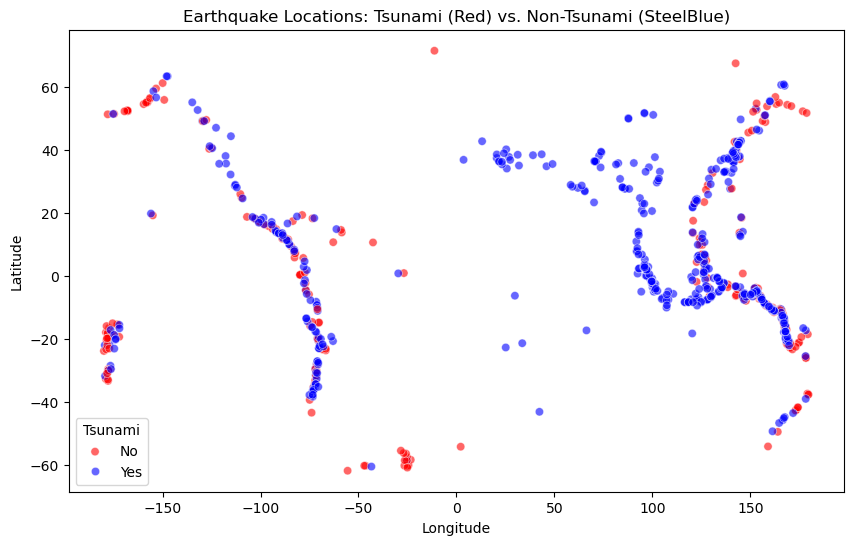

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='tsunami', data=df, palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Earthquake Locations: Tsunami (Red) vs. Non-Tsunami (SteelBlue)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Tsunami', labels=['No', 'Yes'])
plt.show()


# 4. Statistical and Comparative Analysis
### Histograms for tsunami vs. non-tsunami

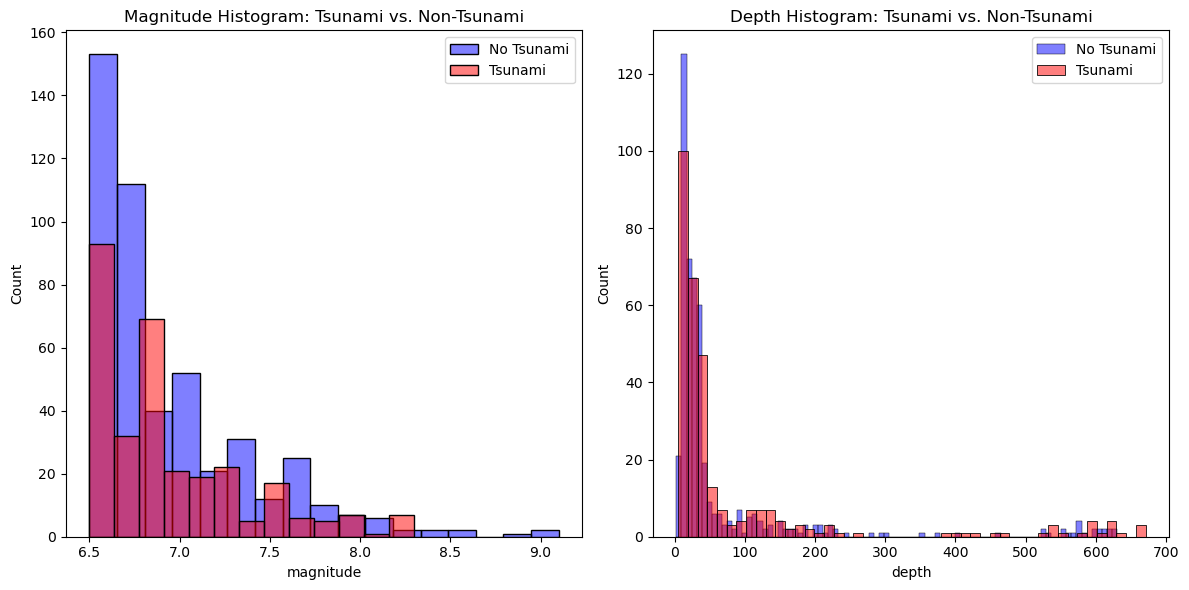

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['tsunami']==0]['magnitude'], color='blue', label='No Tsunami', alpha=0.5)
sns.histplot(df[df['tsunami']==1]['magnitude'], color='red', label='Tsunami', alpha=0.5)
plt.title('Magnitude Histogram: Tsunami vs. Non-Tsunami')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df[df['tsunami']==0]['depth'], color='blue', label='No Tsunami', alpha=0.5)
sns.histplot(df[df['tsunami']==1]['depth'], color='red', label='Tsunami', alpha=0.5)
plt.title('Depth Histogram: Tsunami vs. Non-Tsunami')
plt.legend()
plt.tight_layout()
plt.show()

### Bar chart for tsunami frequency by region (simplified by hemisphere)

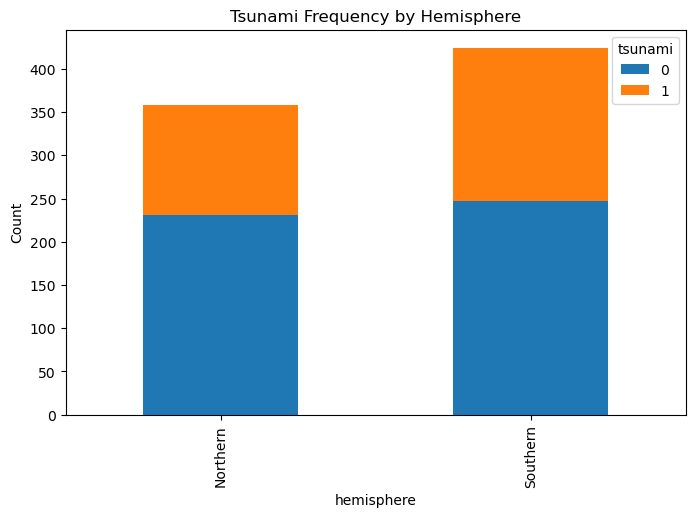

In [21]:
df['hemisphere'] = np.where(df['latitude'] > 0, 'Northern', 'Southern')
region_tsunami = df.groupby(['hemisphere', 'tsunami']).size().unstack()
region_tsunami.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Tsunami Frequency by Hemisphere')
plt.ylabel('Count')
plt.show()

### Correlation heatmap

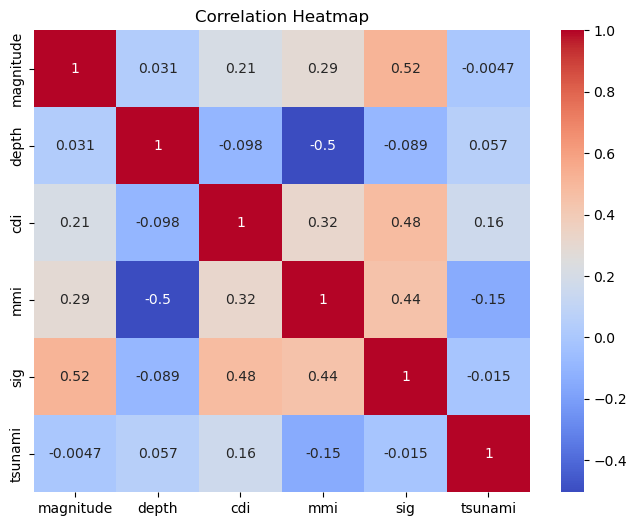

In [23]:
corr = df[['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'tsunami']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
